# <center>Food Project - Machine Learning (start2impact University)</center>

## <center>Prevedere i tipi di vino utilizzando il Machine Learning</center>

<img src="https://t3.gstatic.com/licensed-image?q=tbn:ANd9GcQUeapVVwUmTQ7Zjx4lvffOfrgGENEh9-rSPwDbov6J_Z9l2yJWxSemTPhUkGLX5vAw" />

### Tables of Contents:

[1. Introduzione](#1.-Introduzione)

[2. Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)

[3. Modello SVM Classifier](#3.-Modello-SVM-Classifier)

[4. Conclusioni](#4.-Conclusioni)

## 1. Introduzione

Il progetto consiste nell'addestrare un modello di apprendimento a mia scelta, con almeno un iperparametro da validare, e di valutare la sua performance. Utilizzerò il dataset "Wine" di Sklearn. Il dataset contiene i risultati dell'analisi chimica di vini prodotti da tre diversi coltivatori italiani e l'obiettivo è quello di predire il tipo di vino a partire dai suoi valori chimici.

### 1.1 Import librerie

In [19]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
sns.set()


### 1.2 Import Dataset

In [2]:
#Importo il dataset 'Wine' da Scikit-Learn
wine = datasets.load_wine()
#Analizzo la descrizione del dataset
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

Partendo dalla descrizione del dataset "Wine" di Sklearn, possiamo notare che esso contiene 14 colonne, le prime 13 rappresentano le feature che indicano le caratteristiche chimiche dei vini. L'ultima colonna, denominata "target", rappresenta la variabile qualitativa nominale che indica i tre tipi di vino.



In [3]:
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['target'] = wine.target
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Analizzando il dataset,  notiamo che le feature non sono standardizzate. Pertanto, per assicurarci che il modello non sia influenzato dalla varianza delle feature, andremo in seguito a standardizzare i dati.

In [4]:
#Controllo le info
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [5]:
#Controllo eventuali righe duplicati
df_wine.duplicated().sum()

0

## 2. Exploratory Data Analysis

Effettuo un'esplorazione dei dati per avere una migliore comprensione dei dati. In particolare sono interessato a vedere se riesco a trovare eventuali correlazioni tra le feature e il target

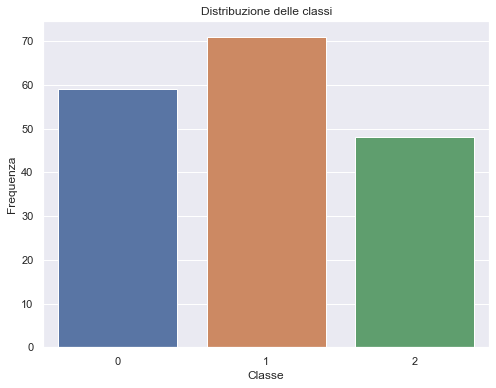

In [16]:
# Calcolo la frequenza delle classi
class_frequencies = df_wine['target'].value_counts()

# Creo il grafico a barre
plt.figure(figsize=(8, 6))
sns.barplot(x=class_frequencies.index, y=class_frequencies.values)
plt.xlabel('Classe')
plt.ylabel('Frequenza')
plt.title('Distribuzione delle classi')
plt.show()

In [14]:
print(class_frequencies)

1    71
0    59
2    48
Name: target, dtype: int64


Dal grafico possiamo notare un lieve sbilanciamento delle classi. Non reputo questo sbilanciamento significativo da applicare tecniche di oversampling o undersampling per il ribilanciamento delle classi.

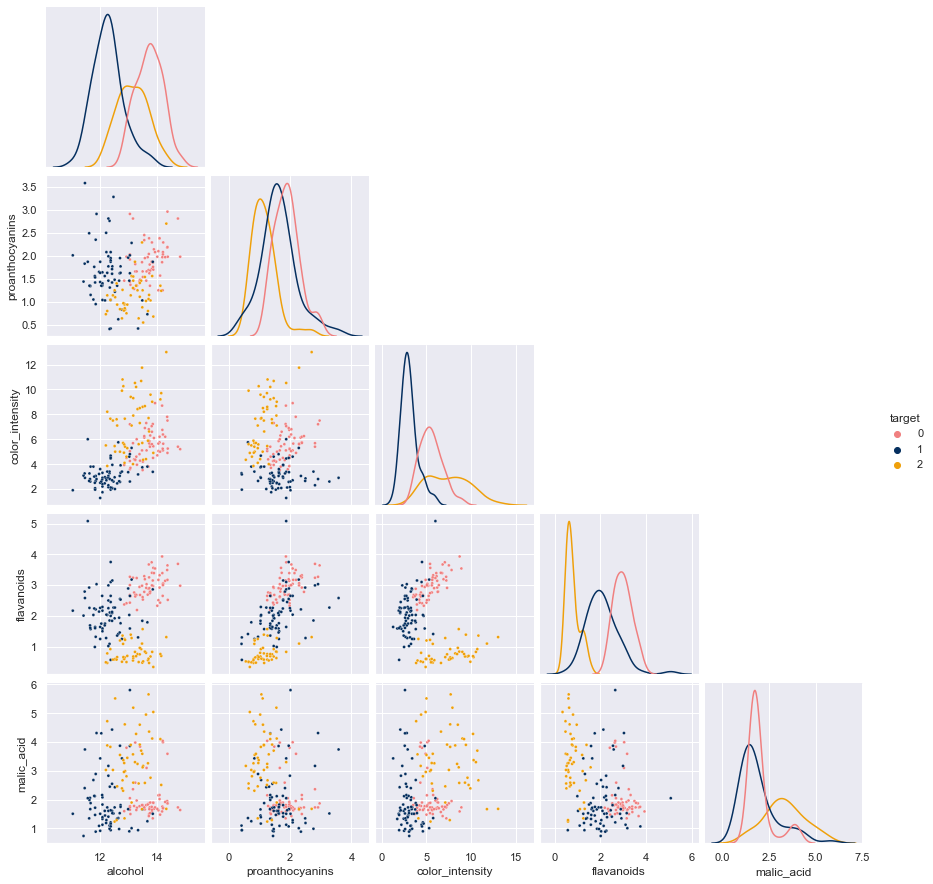

In [18]:

cols = ['alcohol', 'proanthocyanins', 'color_intensity', 'target', 'flavanoids', 'malic_acid']

sns.pairplot(df_wine[cols], 
             hue='target', 
             palette={0: '#F08080', 1: '#052F5F', 2: '#EFA00B'}, 
             corner=True,
             diag_kws={'fill': False},
             plot_kws={'s': 9})

plt.show()

Ho generato una serie di grafici che mostra la relazione tra due caratteristiche del dataset e con i colori ho rappresentato le classi target. In questo modo possiamo farci un'idea iniziale di eventuali divisioni o tendenze tra le classi basate sulle due caratteristiche. Possiamo notare che la caratteristica alcohol (percentuale alcolica) in combinazione con le altre caratteristiche, eccetto malic_acid, genera una discreta distinzione tra le classi.

## 3. Modello SVM Classifier

Ho scelto il Support Vector Machine perché è in grado di gestire efficacemente problemi di classificazione binaria e multiclasse. In particolare, SVM cerca di trovare un iperpiano che separa i punti di una classe dai punti delle altre classi nello spazio delle feature. Questo lo rende particolarmente adatto per dataset con feature di alta dimensionalità come il dataset Wine. Inoltre è noto per essere un buon modello per quando ci sono pochi dati a disposizione.

In [7]:
# Divido i dati
# Sulla X ho le features
# Sulla y il target
X = df_wine.drop(['target'],axis=1).values
y = df_wine['target'].values

#Divido in dati di train e dati di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124, 13), (54, 13), (124,), (54,))

In [8]:
# Normalizzo i dati
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Utilizzerò GridSearchCV per cercare i migliori valori degli iperparametri C e kernel del modello. C è il parametro di regolarizzazione che controlla il trade-off tra la massimizzazione della larghezza della separazione tra le classi e la minimizzazione dell'errore di classificazione. 

I tre kernel più comuni utilizzati sono:

- Il kernel lineare viene utilizzato quando i dati sono linearmente separabili,
- il kernel RBF (Radial Basis Function) quando i dati non sono linearmente separabili,
- il kernel polinomiale mappare le feature dello spazio di partenza in modo polinomiale.

In [9]:
# Cerco i migliori parametri con la Grid Search

svc_params = [
    {"kernel": ["linear"], "C": [0.01, 0.1, 1, 10, 100]},
    {"kernel": ["rbf"], "C": [0.01, 0.1, 1, 10, 100], "gamma": [0.01, 0.1, 1, 10, 100]},
    {"kernel": ["poly"], "C": [0.01, 0.1, 1, 10, 100], "degree": np.arange(1, 5, 1)}
]

# C: regola la dimensione dei margini. Li aumenta o riduce per controllare il trade-off tra la riduzione degli errori e la complessità del modello.
# gamma: (RBF) regola la curvatura dei margini
# degree: (POLY) indica il grado della funzione polinomiale

# Creo un oggetto Grid Search
grid_search = GridSearchCV(SVC(), param_grid=svc_params, cv=5)

# Addestro il modello con la Grid Search
grid_search.fit(X_train, y_train)


# Stampo i parametri migliori
print("Best parameters:", grid_search.best_params_)


Best parameters: {'C': 1, 'kernel': 'linear'}


Ora utilizzo la metrica di accuracy per valutare le prestazioni del migior modello ottenuto dal GridSearchCV.

In [10]:
# Utilizzo il modello migliore per fare le predizioni
y_pred_train = grid_search.predict(X_train)

# Valuto le prestazioni del modello
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.4f}".format(accuracy_train))

Accuracy: 1.0000


In [11]:
# Utilizzo il modello migliore per fare le predizioni
y_pred_test = grid_search.predict(X_test)

# Valuto le prestazioni del modello
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy: {:.4f}".format(accuracy_test))

Accuracy: 0.9815


Uso la matrice di confusione che mi permette di vedere quanti campioni del set di test sono stati classificati correttamente in ciascuna classe e quanti sono stati classificati in modo errato. 

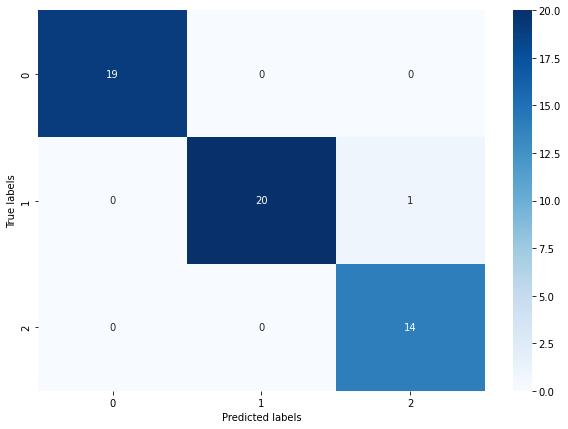

In [12]:
# Calcolo la matrice di confusione
cm = confusion_matrix(y_test, y_pred_test)
# Disegno la matrice di confusione
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


## 4. Conclusioni

Ho addestrato un modello SVM sul dataset Wine di Sklearn per predire il tipo di vino a partire dai suoi valori chimici. Ho cercato i migliori parametri di SVM per il dataset Wine, che sono C = 1 e kernel = 'linear'. 

Ho ottenuto un'accuratezza del 100% sul set di addestramento e del 98,15% sul set di test. Questi risultati suggeriscono che il modello ha imparato a generalizzare bene e che è in grado di fare previsioni accurate su nuovi dati. 
Ho anche generato una matrice di confusione che mostra come il modello ha classificato correttamente la maggior parte dei vini nel set di test. In particolare, ho ottenuto 19 predizioni corrette su 19 per il vino di tipo 0, 20 predizioni corrette su 21 per il vino di tipo 1 e 14 predizioni corrette su 14 per il vino di tipo 2.

Il progetto dimostra che l'addestramento di un modello di Machine Learning può essere una soluzione molto utile per risolvere problemi di classificazione come quello del dataset Wine. Inoltre, l'utilizzo della validazione dell'iperparametro può aiutare a ottenere modelli più precisi e affidabili.